In [198]:
import pandas as pd
import numpy as np

gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

### import pandas as pd
import numpy as np

# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(3)

In [200]:
#del df1['None']

cols = list(df1.columns)
cols



['id',
 'postedTime',
 'body',
 'None',
 "['twitter_entiteis:urls:url']",
 "['None']",
 "['actor:languages_list-items']",
 'gnip:language:value',
 'twitter_lang',
 "[u'geo:coordinates_list-items']",
 'geo:type',
 'None.1',
 'None.2',
 'None.3',
 'None.4',
 'actor:utcOffset',
 'None.5',
 'None.6',
 'None.7',
 'None.8',
 'None.9',
 'None.10',
 'None.11',
 'None.12',
 'None.13',
 'actor:displayName',
 'actor:preferredUsername',
 'actor:id',
 'gnip:klout_score',
 'actor:followersCount',
 'actor:friendsCount',
 'actor:listedCount',
 'actor:statusesCount',
 'Tweet',
 'None.14',
 'None.15',
 'None.16']

In [201]:
df1[df1.twitter_lang == 'ru'].tail(2)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None
65,"tag:search.twitter.com,2005:351835320226029568",2013-07-01T22:50:51.000Z,на аске осталась и в аск буке :),None,None,None,['ru'],en,ru,None,None,"['[47.7674, 56.588]', '[47.7674, 56.6686000000...",Polygon,"Йошкар-Ола, Марий Эл республика",RU,14400,None,None,None,None,None,None,None,None,None,SokoVikova,NataliaBoston97,929621287,23,34,30,0,696,Tweet,None,None,None


In [202]:
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.tail(2)

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
93,30,48,88,0
94,41,198,188,0


In [203]:
df2.dtypes 

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [204]:
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)


In [205]:
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [206]:
df2 = df2.astype(float)

df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [207]:

df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']

df2.head()


,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


In [208]:
df1.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [209]:
pop_df = df1[df1["actor:followersCount"] >= 100]
pop_df.tail(3)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [210]:
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')
lang_gb.tail()

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
5,tr,41,226,346,7759
7,tr,40,304,233,3558
16,und,53,1179,628,20141
18,he,37,151,284,641
20,it,46,1999,293,60236
22,id,43,258,302,2732
23,tr,None,349,244,12236
24,pl,48,2037,1984,23240
29,id,33,404,378,9181


In [211]:
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


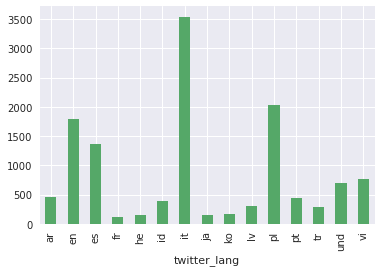

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

lang_gb_mean['actor:followersCount'].plot(kind='bar', color='g')

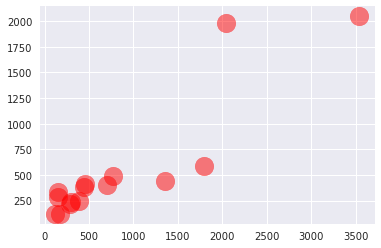

In [213]:
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=350,\
            color='red',\
            marker='o')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee30e340d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fee29dabd50>]], dtype=object)

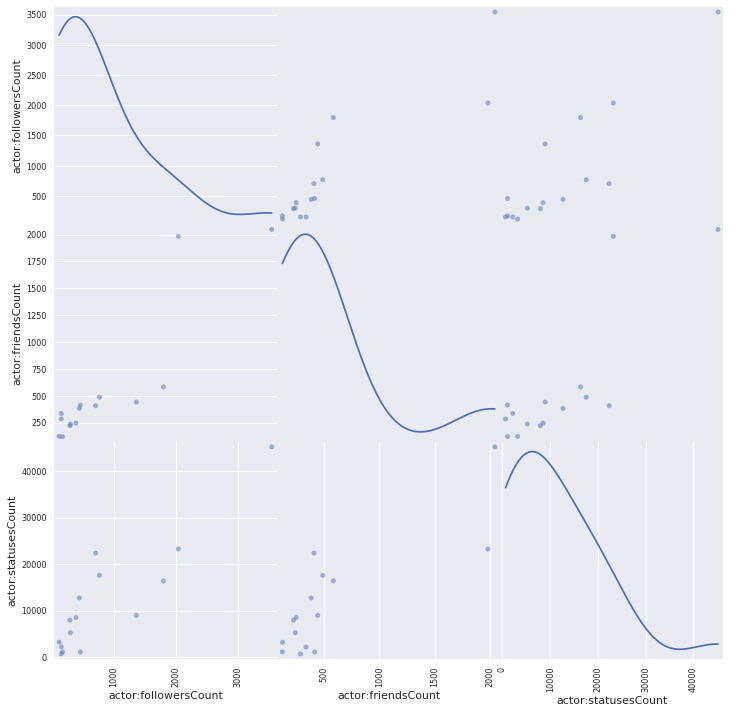

In [214]:
from pandas.plotting import scatter_matrix

scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

In [215]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.tail()

,A,B,C,D
2002-09-22,-45.752323,21.311796,14.033624,-34.556934
2002-09-23,-46.554098,23.020511,13.950100,-33.071822
2002-09-24,-46.039124,24.071354,13.097862,-33.576890
2002-09-25,-45.524411,24.500505,14.928607,-34.925263
2002-09-26,-44.187784,25.640311,14.864151,-35.479109


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee28bf1490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fee28fa2210>]], dtype=object)

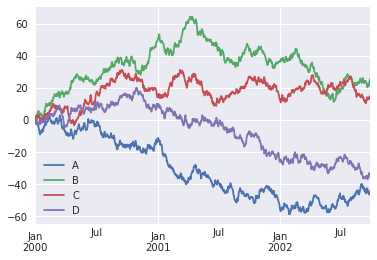

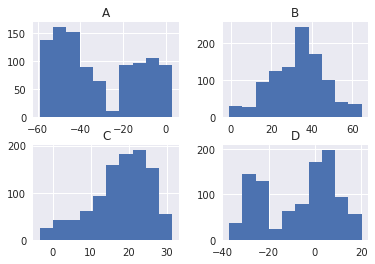

In [216]:
df.plot()
df.hist()

In [217]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)



In [218]:
np.random.seed(sum(map(ord, "distributions")))

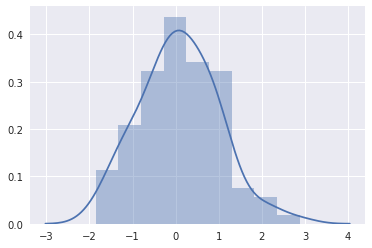

In [219]:
x = np.random.normal(size=100)
sns.distplot(x);

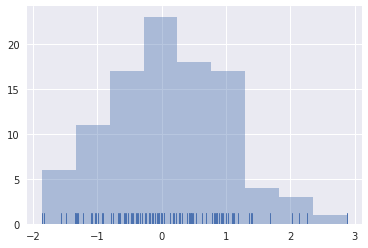

In [220]:
sns.distplot(x, kde=False, rug=True);

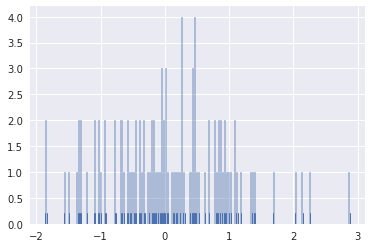

In [221]:
sns.distplot(x, bins=150, kde=False, rug=True);

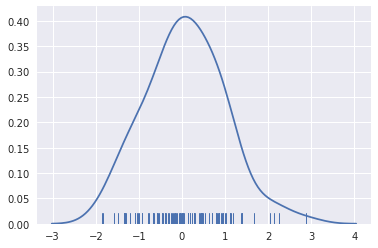

In [222]:
sns.distplot(x, hist=False, rug=True);

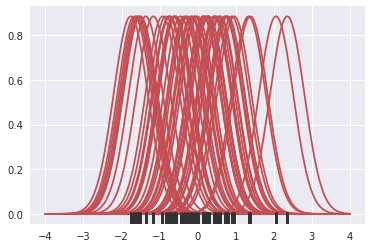

In [223]:
x = np.random.normal(0, 1, size=50)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

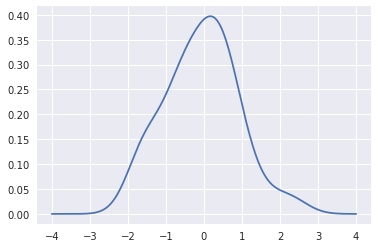

In [224]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

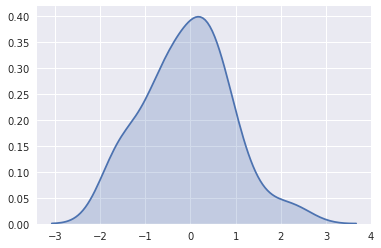

In [225]:
sns.kdeplot(x, shade=True);

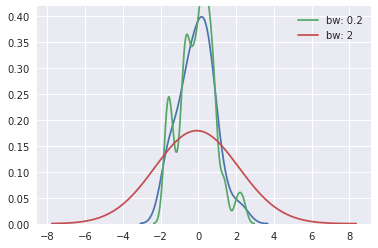

In [226]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

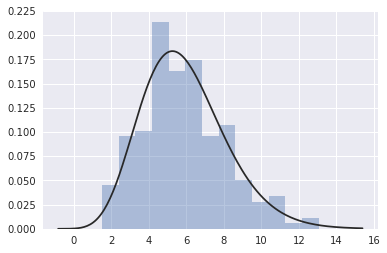

In [227]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [228]:
mean, cov = [0, 5], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,1.960942,5.397567
1,-0.944676,5.746539
2,-0.669979,5.988969
3,1.348405,5.956400
4,-0.090050,4.963801


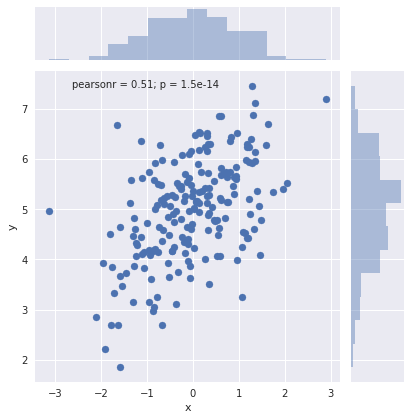

In [229]:
sns.jointplot(x="x", y="y", data=df);

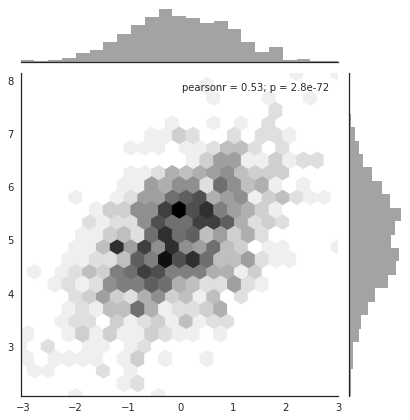

In [230]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

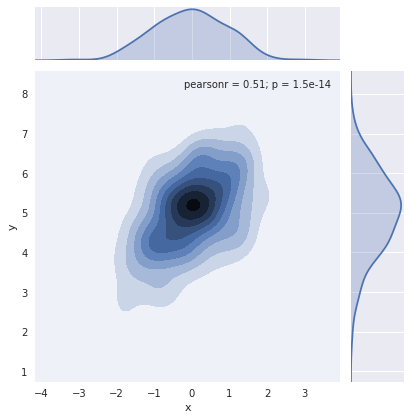

In [231]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

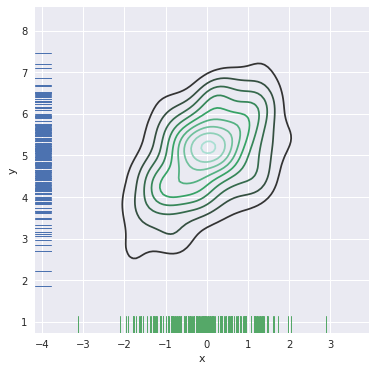

In [232]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

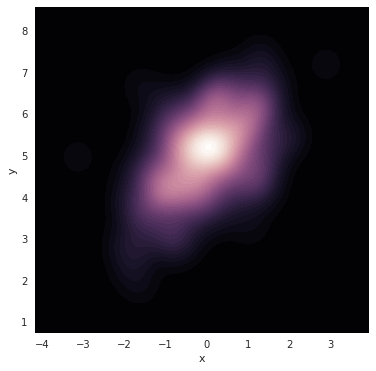

In [233]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

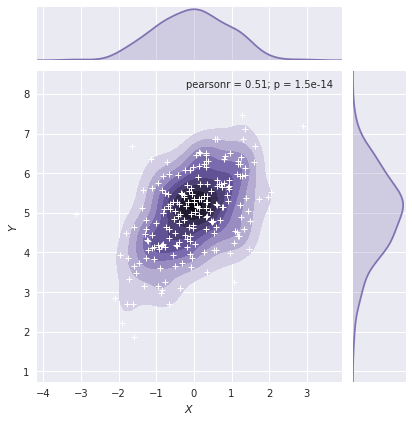

In [234]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

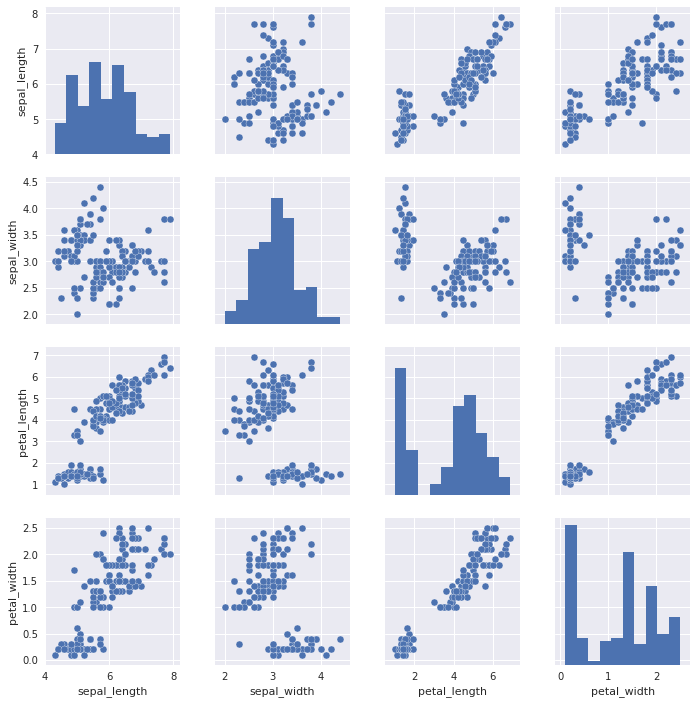

In [235]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

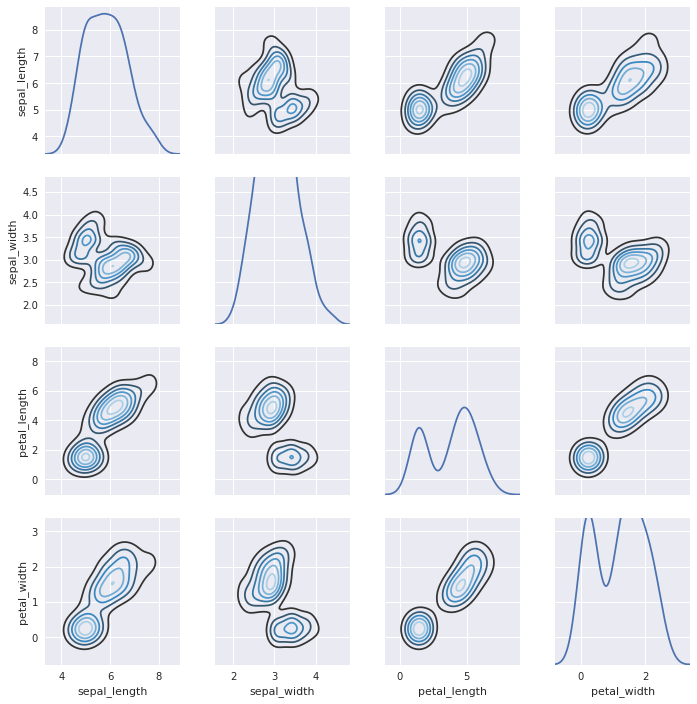

In [236]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [237]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))


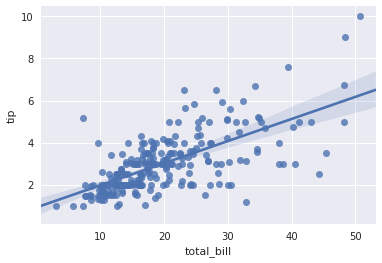

In [238]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

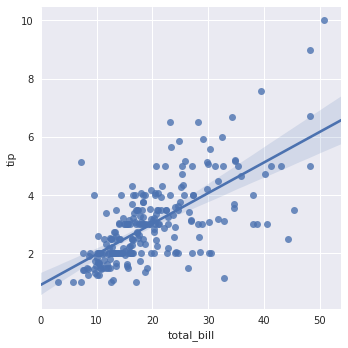

In [239]:
sns.lmplot(x="total_bill", y="tip", data=tips);

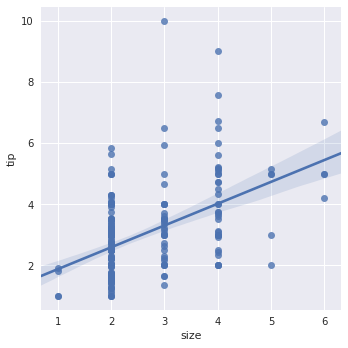

In [240]:
sns.lmplot(x="size", y="tip", data=tips);

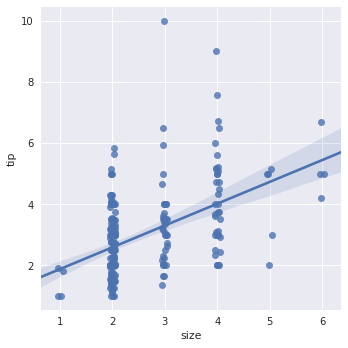

In [241]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

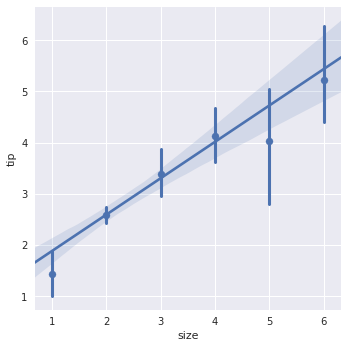

In [242]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [243]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


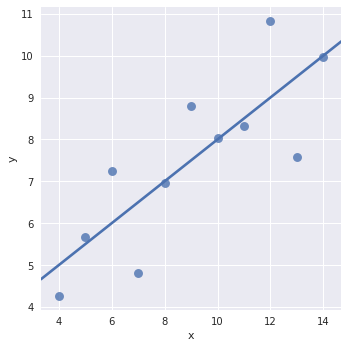

In [244]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

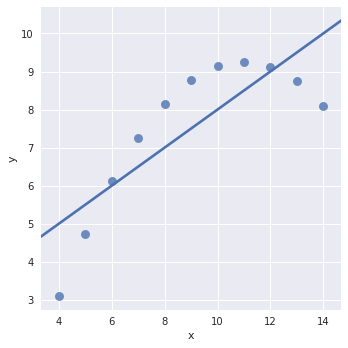

In [245]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

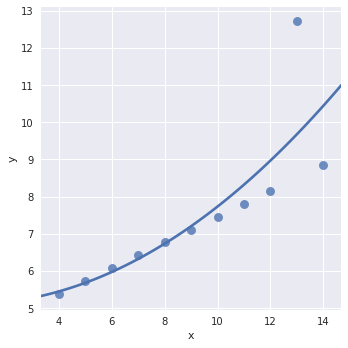

In [246]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           order=2, ci=None, scatter_kws={"s": 80});

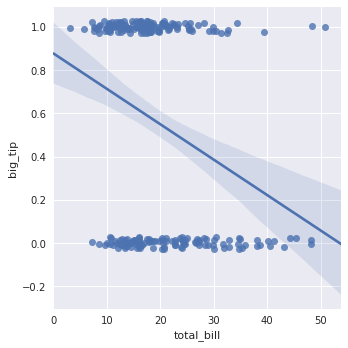

In [247]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

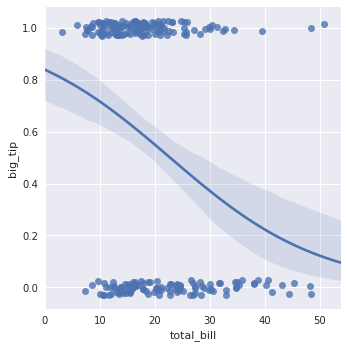

In [248]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

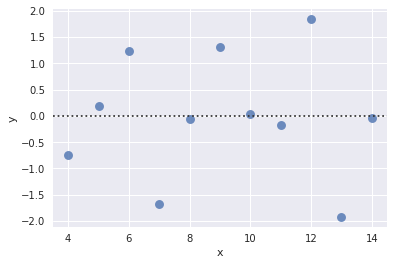

In [249]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

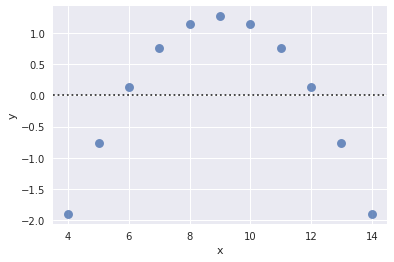

In [250]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

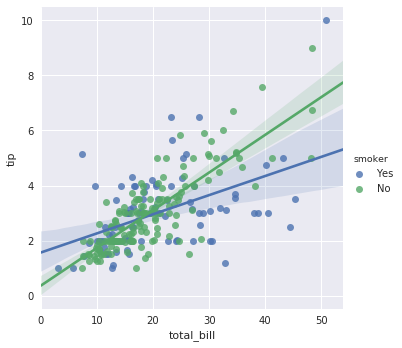

In [251]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

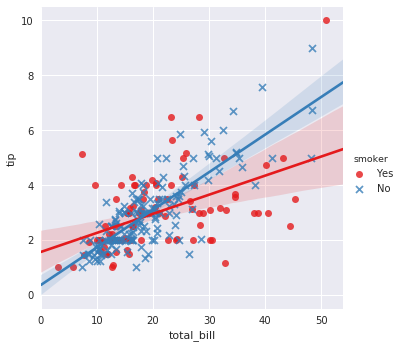

In [252]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

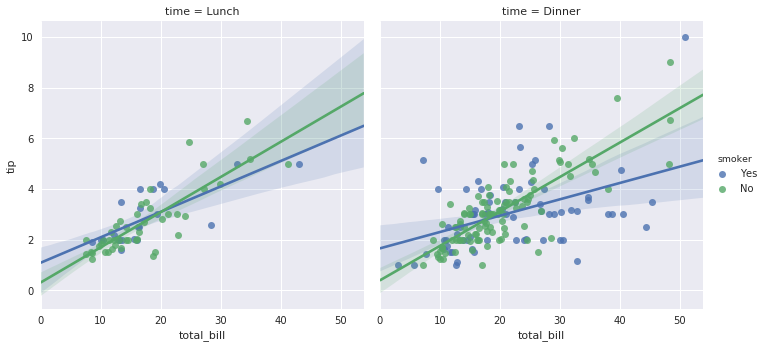

In [253]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

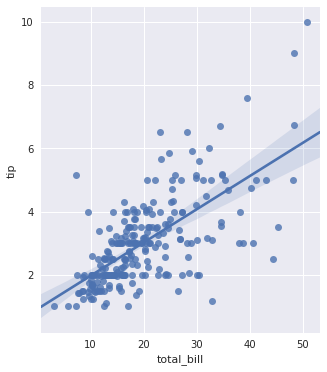

In [254]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

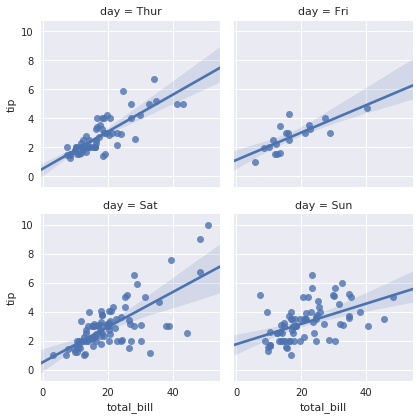

In [255]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

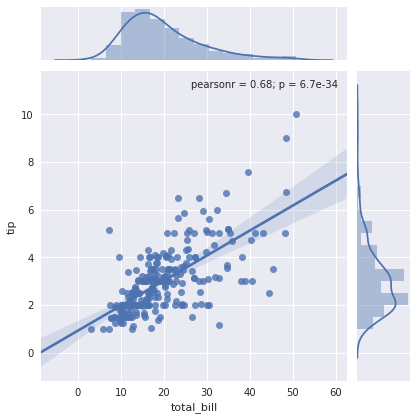

In [256]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

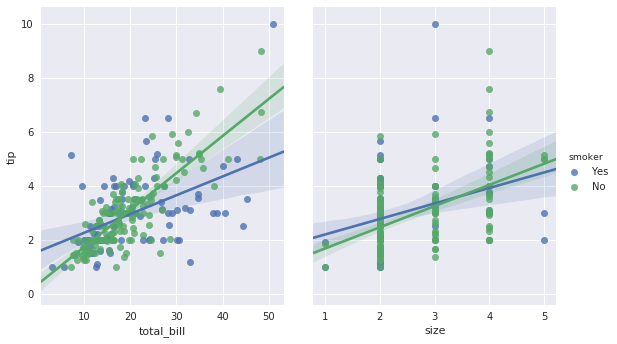

In [257]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

In [258]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

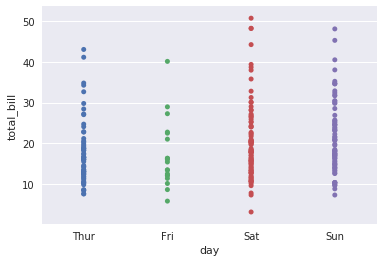

In [259]:
sns.stripplot(x="day", y="total_bill", data=tips);

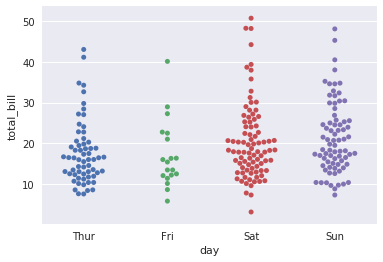

In [260]:
sns.swarmplot(x="day", y="total_bill", data=tips);

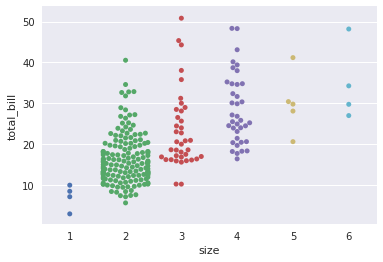

In [261]:
sns.swarmplot(x="size", y="total_bill", data=tips);

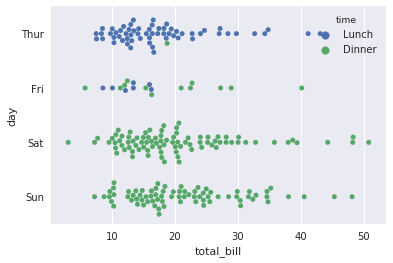

In [262]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

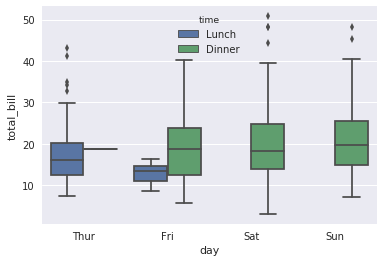

In [263]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

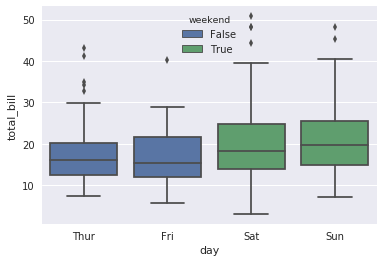

In [264]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

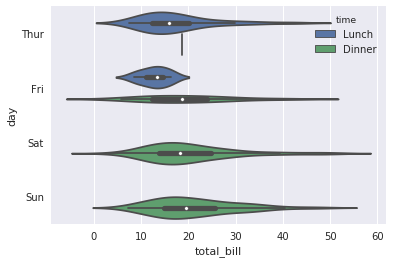

In [265]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

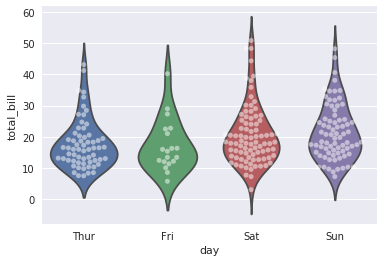

In [266]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

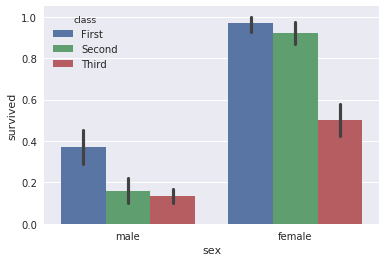

In [268]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

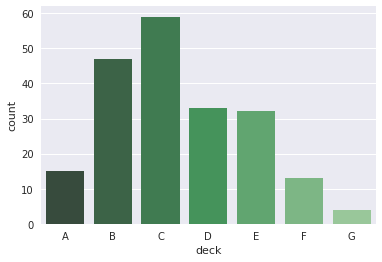

In [269]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

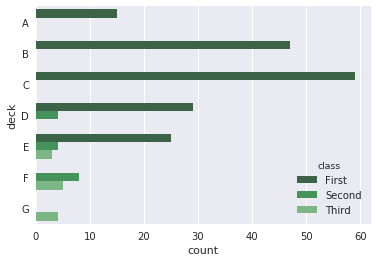

In [270]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

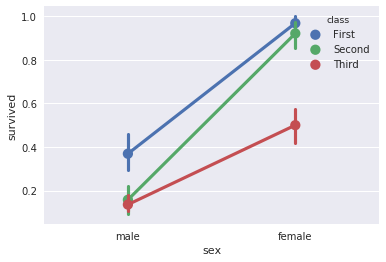

In [271]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

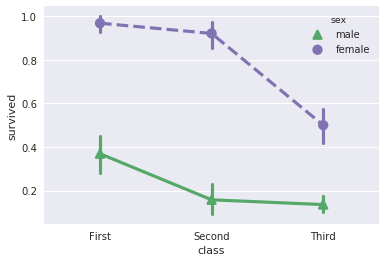

In [272]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

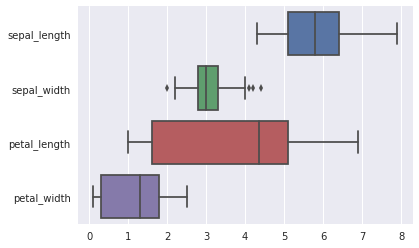

In [273]:
sns.boxplot(data=iris, orient="h");

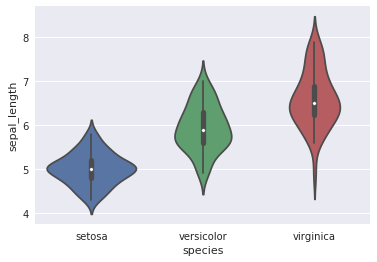

In [274]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

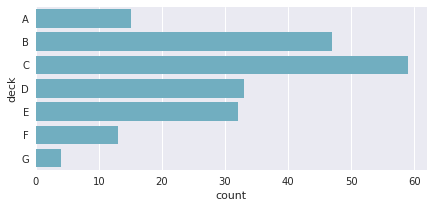

In [275]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

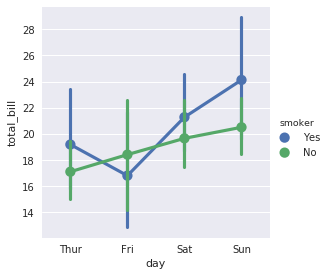

In [276]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

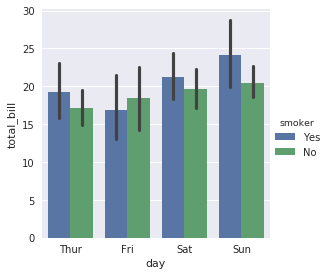

In [277]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

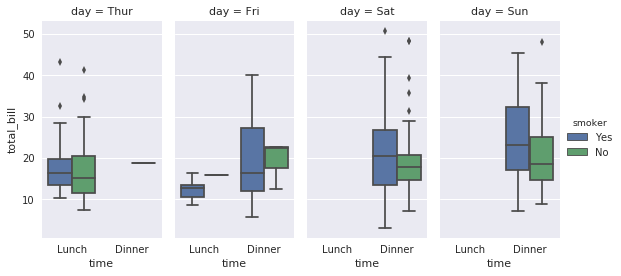

In [278]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

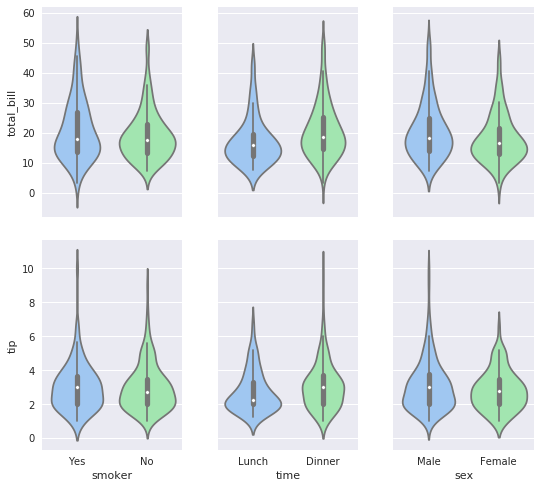

In [279]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

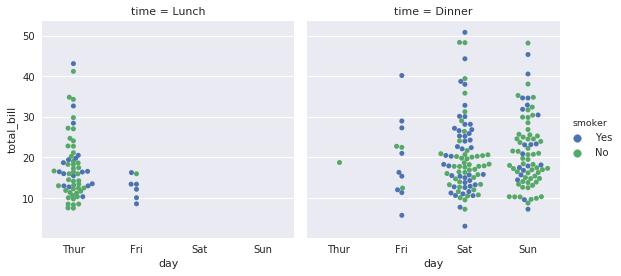

In [280]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");